### First cleaning cathepsin B

### removing unnecessary columns

In [30]:
import pandas as pd

# Load the original dataset
# df = pd.read_csv('./bindingdb_initial/catB_bindingdb.tsv', sep='\t')
# df = pd.read_csv('./bindingdb_initial/catS_bindingdb.tsv', sep='\t')
# df = pd.read_csv('./bindingdb_initial/catD_bindingdb.tsv', sep='\t')
df = pd.read_csv('./bindingdb_initial/catK_bindingdb.tsv', sep='\t')


# Select the relevant columns
columns_to_keep = [ 
    'Target Name','IC50 (nM)','Target Source Organism According to Curator or DataSource',
    'Ligand SMILES'
]
df_filtered = df[columns_to_keep]

# Save the filtered data to a new TSV file
# df_filtered.to_csv('./Intermediate_bindingdb/Limited_Columns_data_B.tsv', sep='\t', index=False)
# df_filtered.to_csv('./Intermediate_bindingdb/Limited_Columns_data_S.tsv', sep='\t', index=False)
# df_filtered.to_csv('./Intermediate_bindingdb/Limited_Columns_data_D.tsv', sep='\t', index=False)
df_filtered.to_csv('./Intermediate_bindingdb/Limited_Columns_data_K.tsv', sep='\t', index=False)





### Removing Missing IC50 values

In [31]:
import pandas as pd

# Load the dataset
# df = pd.read_csv('./Intermediate_bindingdb/Limited_Columns_data_B.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/Limited_Columns_data_S.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/Limited_Columns_data_D.tsv', sep='\t')
df = pd.read_csv('./Intermediate_bindingdb/Limited_Columns_data_K.tsv', sep='\t')


# Check for missing values in 'IC50 (nM)' column
missing_ic50 = df['IC50 (nM)'].isna().sum()  # Count rows with missing IC50 values
non_missing_ic50 = df['IC50 (nM)'].notna().sum()  # Count rows with non-missing IC50 values

print(f"Rows with missing IC50 values: {missing_ic50}")
print(f"Rows with non-missing IC50 values: {non_missing_ic50}")


Rows with missing IC50 values: 891
Rows with non-missing IC50 values: 2114


In [32]:
import pandas as pd

# Load the dataset
# df = pd.read_csv('./Intermediate_bindingdb/Limited_Columns_data_B.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/Limited_Columns_data_S.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/Limited_Columns_data_D.tsv', sep='\t')
df = pd.read_csv('./Intermediate_bindingdb/Limited_Columns_data_K.tsv', sep='\t')


# Remove rows with missing values in 'IC50 (nM)' column
df_clean = df.dropna(subset=['IC50 (nM)'])

# Optionally, save the cleaned data to a new file
# df_clean.to_csv('./Intermediate_bindingdb/IC50_cleaned_B.tsv', sep='\t', index=False)
# df_clean.to_csv('./Intermediate_bindingdb/IC50_cleaned_S.tsv', sep='\t', index=False)
# df_clean.to_csv('./Intermediate_bindingdb/IC50_cleaned_D.tsv', sep='\t', index=False)
df_clean.to_csv('./Intermediate_bindingdb/IC50_cleaned_K.tsv', sep='\t', index=False)


# Check the number of rows removed
missing_ic50 = df['IC50 (nM)'].isna().sum()  # Rows still missing IC50
non_missing_ic50 = df_clean['IC50 (nM)'].notna().sum()  # Rows with non-missing IC50

print(f"Rows with missing IC50 values removed. Now {non_missing_ic50} rows have IC50 values.")


Rows with missing IC50 values removed. Now 2114 rows have IC50 values.


### Selecting only HOMO Sapiens data

In [33]:
# removing all non human ones
import pandas as pd

# Load the dataset
# df = pd.read_csv('./Intermediate_bindingdb/IC50_cleaned_B.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/IC50_cleaned_S.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/IC50_cleaned_D.tsv', sep='\t')
df = pd.read_csv('./Intermediate_bindingdb/IC50_cleaned_K.tsv', sep='\t')


# Filter the dataset for rows where the target organism is Homo sapiens
df_homo_sapiens = df[df['Target Source Organism According to Curator or DataSource'] == 'Homo sapiens']

# Save the filtered DataFrame to a new file
# df_homo_sapiens.to_csv('./Intermediate_bindingdb/homo_sapiens_only_data_B.tsv', sep='\t', index=False)
# df_homo_sapiens.to_csv('./Intermediate_bindingdb/homo_sapiens_only_data_S.tsv', sep='\t', index=False)
# df_homo_sapiens.to_csv('./Intermediate_bindingdb/homo_sapiens_only_data_D.tsv', sep='\t', index=False)
df_homo_sapiens.to_csv('./Intermediate_bindingdb/homo_sapiens_only_data_K.tsv', sep='\t', index=False)


print("Rows with non-Homo sapiens organisms removed. The new file is saved as 'homo_sapiens_only_data.tsv'.")


Rows with non-Homo sapiens organisms removed. The new file is saved as 'homo_sapiens_only_data.tsv'.


### Selecting unique ligands

In [34]:
import pandas as pd

# Load the dataset
# df = pd.read_csv('./Intermediate_Bindingdb/homo_sapiens_only_data_B.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_Bindingdb/homo_sapiens_only_data_S.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_Bindingdb/homo_sapiens_only_data_D.tsv', sep='\t')
df = pd.read_csv('./Intermediate_Bindingdb/homo_sapiens_only_data_K.tsv', sep='\t')


# Get the count of unique values in a specific column
column_name = 'Ligand SMILES'  # Replace with your column name
unique_counts = df[column_name].value_counts()

# Print the counts of unique values
print(unique_counts)


Ligand SMILES
O=C(NC1CCN(C1)C#N)OCc1ccccc1                                                        8
CC(C)(F)C[C@H](N[C@@H](c1ccc(cc1)-c1ccc(cc1)S(C)(=O)=O)C(F)(F)F)C(=O)NC1(CC1)C#N    8
O=C(NCC1CN(C1)C#N)C1CCCCC1                                                          7
N#CN1CCCC1                                                                          7
N#CN1Cc2cc3ccccc3nc2C1                                                              7
                                                                                   ..
O[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1cnc2c(NC3CCCCC3)nc(nc12)C#N                        1
CCCC[C@H](NC(=O)OCC1(CC)COC1)C(=O)C(=O)Nc1cc(n[nH]1)-c1ccccc1                       1
CC(C)(C)c1csc(n1)N1CCN(CC1)C(=O)[C@@H]1CCCC[C@H]1C(=O)NC1(CC1)C#N                   1
FC(F)(F)c1cccc(c1)-c1cc(CCCNCc2nnn[nH]2)nc(n1)C#N                                   1
COC(=O)NCCCC[C@H](NC(=O)OC(C)(C)C)C=O                                               1
Name: count, Length: 1674, dtype: int64


In [35]:
import pandas as pd

# Load the dataset
# df = pd.read_csv('./Intermediate_bindingdb/homo_sapiens_only_data_B.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/homo_sapiens_only_data_S.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/homo_sapiens_only_data_D.tsv', sep='\t')
df = pd.read_csv('./Intermediate_bindingdb/homo_sapiens_only_data_K.tsv', sep='\t')

# Drop duplicate rows based on the 'Ligand SMILES' column (or use another unique identifier)
df_unique_ligands = df.drop_duplicates(subset='Ligand SMILES')  # Replace 'Ligand SMILES' with the desired column

# Save the dataset with unique ligands to a new file
# df_unique_ligands.to_csv('./Intermediate_bindingdb/unique_ligands_data_B.tsv', sep='\t', index=False)
# df_unique_ligands.to_csv('./Intermediate_bindingdb/unique_ligands_data_S.tsv', sep='\t', index=False)
# df_unique_ligands.to_csv('./Intermediate_bindingdb/unique_ligands_data_D.tsv', sep='\t', index=False)
df_unique_ligands.to_csv('./Intermediate_bindingdb/unique_ligands_data_K.tsv', sep='\t', index=False)

print("The new file with unique ligands is saved as 'unique_ligands_data.tsv'.")


The new file with unique ligands is saved as 'unique_ligands_data.tsv'.


In [36]:
import pandas as pd

# Load the dataset
# df = pd.read_csv('./Intermediate_bindingdb/unique_ligands_data_B.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/unique_ligands_data_S.tsv', sep='\t')
# df = pd.read_csv('./Intermediate_bindingdb/unique_ligands_data_D.tsv', sep='\t')
df = pd.read_csv('./Intermediate_bindingdb/unique_ligands_data_K.tsv', sep='\t')


# Get the count of unique values in a specific column
column_name = 'Ligand SMILES'  # Replace with your column name
unique_counts = df[column_name].value_counts()

# Print the counts of unique values
print(unique_counts)


Ligand SMILES
CC(C)CC(NC(=O)c1cccc(c1)-c1ccc(cc1)S(C)(=O)=O)C(=O)N(C)N(C)C#N                         1
COc1cccc(CCNC(=O)c2cnc(nc2NCC(C)(C)C)C#N)c1                                            1
COc1ccc(CCNC(=O)c2cnc(nc2NCC(C)(C)C)C#N)cc1                                            1
CC(C)(C)CNc1nc(ncc1C(=O)NCCc1cccc(OCCn2ccnc2)c1)C#N                                    1
CC(C)(C)CNc1nc(ncc1C(=O)NCCc1ccc(OCCn2ccnc2)cc1)C#N                                    1
                                                                                      ..
CCCC[C@H](NC(=O)O[C@H](Cn1cc(cn1)-c1ccc(cc1)C(F)(F)F)C(C)(C)C)C(=O)C(=O)Nc1ccn[nH]1    1
CCCC[C@H](NC(=O)O[C@H](Cc1nnc(o1)-c1ccc(cc1)C(F)(F)F)C(C)(C)C)C(=O)C(=O)Nc1ccn[nH]1    1
COc1ccc(CCNC(=O)c2cnc(nc2NCC(C)(C)C)C#N)cc1OCCn1ccnc1                                  1
CN1CCN(CC1)c1ccc(CCNC(=O)c2cnc(nc2NC2CCCCC2)C#N)cc1                                    1
C[C@@H](CC1CCCCC1)OC(=O)C1CCN1C#N                                                      1
Name: c

### Adding Potency

In [37]:
import pandas as pd

# Function to update IC50 values based on the given conditions
def update_ic50(value):
    if isinstance(value, str):
        if value.startswith("<"):
            # For "<" values, decrease by 0.1
            return float(value[1:]) - 0.1
        elif value.startswith(">"):
            # For ">" values, increase by 0.1
            return float(value[1:]) + 0.1
    return float(value)  # Ensure that it's a float value

# Function to categorize based on IC50 values (output as numeric potency)
def categorize_potency(ic50):
    if ic50 < 1:
        return "3"  # Potent
    elif 1 <= ic50 < 100:
        return "2"  # Active
    elif 100 <= ic50 < 1000:
        return "1"  # Intermediate
    elif ic50 >= 1000:
        return "0"  # Inactive
    else:
        return "-1"  # Unknown

def update_ic50_in_tsv(input_file, output_file):
    # Read the TSV file
    df = pd.read_csv(input_file, sep='\t')

    # Update the IC50 column
    df['IC50 (nM)'] = df['IC50 (nM)'].apply(update_ic50)

    # Add Potency column based on updated IC50 values
    df['Potency'] = df['IC50 (nM)'].apply(categorize_potency)

    # Save the updated dataframe to a new TSV file
    df.to_csv(output_file, sep='\t', index=False)

# Example usage
# input_file = './Intermediate_bindingdb/unique_ligands_data_B.tsv'  # Replace with your input TSV file path
# output_file = './Intermediate_bindingdb/updated_ic50_with_potency_data_B.tsv'  # Replace with desired output file path

# input_file = './Intermediate_bindingdb/unique_ligands_data_S.tsv'  # Replace with your input TSV file path
# output_file = './Intermediate_bindingdb/updated_ic50_with_potency_data_S.tsv'  # Replace with desired output file path

# input_file = './Intermediate_bindingdb/unique_ligands_data_D.tsv'  # Replace with your input TSV file path
# output_file = './Intermediate_bindingdb/updated_ic50_with_potency_data_D.tsv'  # Replace with desired output file path

input_file = './Intermediate_bindingdb/unique_ligands_data_K.tsv'  # Replace with your input TSV file path
output_file = './Intermediate_bindingdb/updated_ic50_with_potency_data_K.tsv'  # Replace with desired output file path

update_ic50_in_tsv(input_file, output_file)


### Plotting

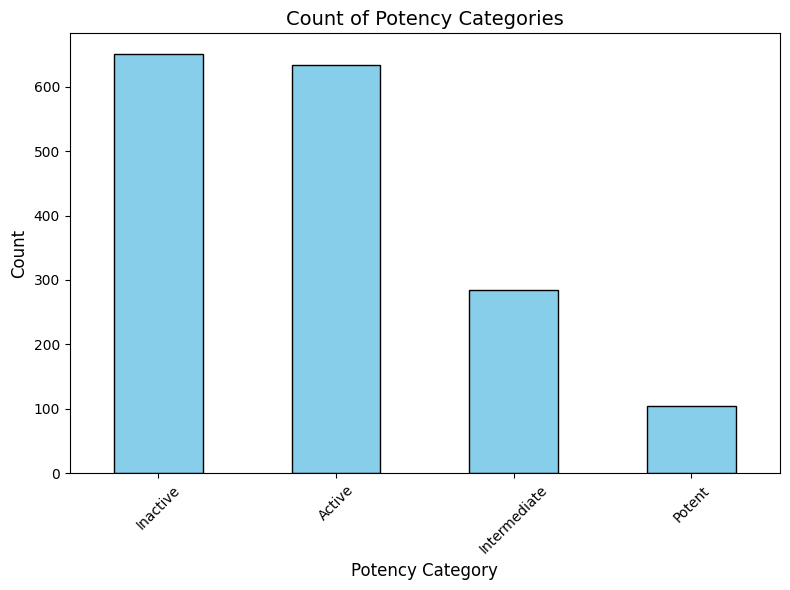

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to categorize based on IC50 values (output as potency categories)
def categorize_potency(ic50):
    if ic50 < 1:
        return "Potent"
    elif 1 <= ic50 < 100:
        return "Active"
    elif 100 <= ic50 < 1000:
        return "Intermediate"
    elif ic50 >= 1000:
        return "Inactive"
    else:
        return "Unknown"

# Load data from TSV file
# input_file = './Intermediate_bindingdb/updated_ic50_with_potency_data_B.tsv'  # Replace with your input TSV file path
# input_file = './Intermediate_bindingdb/updated_ic50_with_potency_data_S.tsv'  # Replace with your input TSV file path
# input_file = './Intermediate_bindingdb/updated_ic50_with_potency_data_D.tsv'  # Replace with your input TSV file path
input_file = './Intermediate_bindingdb/updated_ic50_with_potency_data_K.tsv'  # Replace with your input TSV file path

df = pd.read_csv(input_file, sep='\t')

# Add Potency column based on IC50 values
df['Potency'] = df['IC50 (nM)'].apply(lambda x: categorize_potency(float(x)))

# Count the occurrences of each category
potency_counts = df['Potency'].value_counts()

# Plotting the count of potency categories
plt.figure(figsize=(8, 6))
potency_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Potency Categories', fontsize=14)
plt.xlabel('Potency Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
